In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 12v
speed_12 = np.array([0.2, 0.5, 1, 2, 3, 4], dtype=np.float32)
pwm_out_12 = np.array([56, 116, 212, 390, 568, 748], dtype=np.float32)

# 11v
speed_11 = np.array([0.2, 0.5, 1, 2, 3, 4], dtype=np.float32)
pwm_out_11 = np.array([59, 123, 226, 424, 617, 807], dtype=np.float32)

# 10v
speed_10 = np.array([0.2, 0.5, 1, 2, 3, 4], dtype=np.float32)
pwm_out_10 = np.array([64, 130, 244, 461, 675, 883], dtype=np.float32)

In [3]:
# 一次多项式拟合（直线）
k_12, b_12 = np.polyfit(speed_12, pwm_out_12, 1)

print(f"k_12 = {k_12:.4f} b_12 = {b_12:.4f}")

# 11
k_11, b_11 = np.polyfit(speed_11, pwm_out_11, 1)

print(f"k_11 = {k_11:.4f} b_11 = {b_11:.4f}")

# 10
k_10, b_10 = np.polyfit(speed_10, pwm_out_10, 1)

print(f"k_10 = {k_10:.4f} b_10 = {b_10:.4f}")

print("average b = ", np.average([b_12, b_11, b_10]))

k_12 = 181.1182 b_12 = 25.3392
k_11 = 196.5591 b_11 = 25.4696
k_10 = 215.8349 b_10 = 24.5943
average b =  25.134373981114635


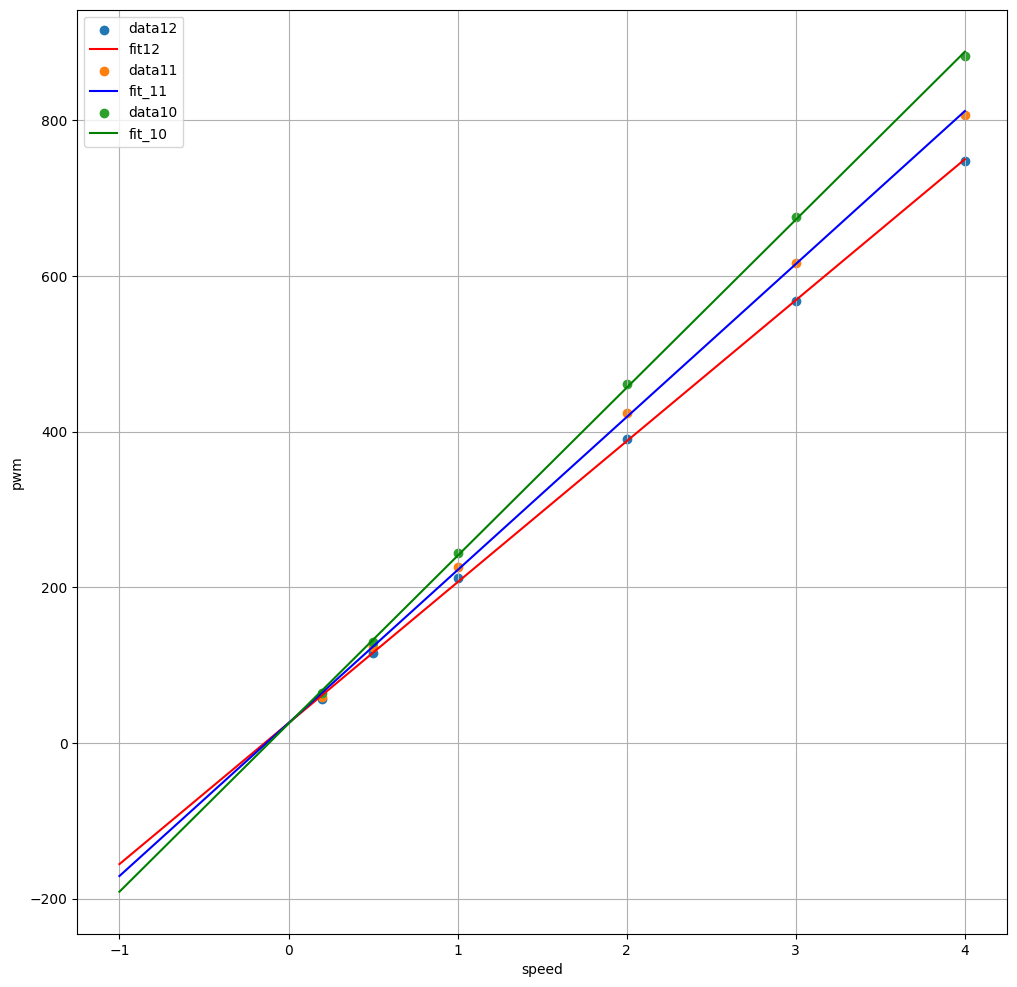

In [4]:
x = np.linspace(-1.0, 4, 200)

plt.figure(figsize=(12, 12))
plt.scatter(speed_12, pwm_out_12, label="data12")
plt.plot(x, k_12 * x + b_12, 'r', label="fit12")

plt.scatter(speed_11, pwm_out_11, label="data11")
plt.plot(x, k_11 * x + b_11, 'b', label="fit_11")

plt.scatter(speed_10, pwm_out_10, label="data10")
plt.plot(x, k_10 * x + b_10, 'g', label="fit_10")
plt.xlabel("speed")
plt.ylabel("pwm")
plt.legend()
plt.grid()
plt.show()

k_voltage = -17.3584
b_voltage = 388.7795


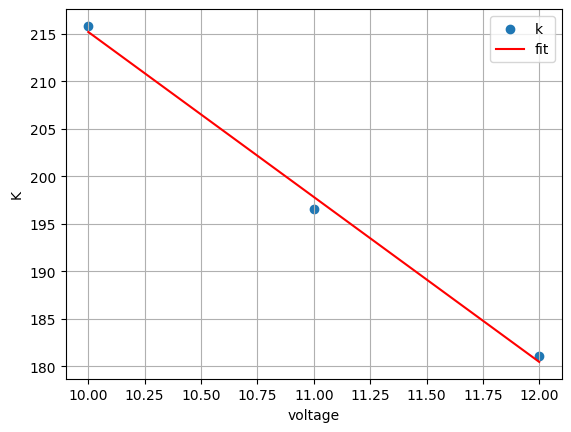

In [5]:
# 绘制斜率 K 随电压的变化曲线
voltage = np.array([12, 11, 10], dtype=np.float32)
pwm_k = np.array([k_12, k_11, k_10], dtype=np.float32)

k_voltage_pwm_k, b_voltage_pwm_k = np.polyfit(voltage, pwm_k, 1)

print(f"k_voltage = {k_voltage_pwm_k:.4f}")
print(f"b_voltage = {b_voltage_pwm_k:.4f}")

plt.scatter(voltage, pwm_k, label="k")
plt.plot(voltage, k_voltage_pwm_k * voltage + b_voltage_pwm_k, 'r', label="fit")

plt.xlabel("voltage")
plt.ylabel("K")
plt.legend()
plt.grid()
plt.show()